#Predicting Liver Diseases Outcomes With Machine Learning

#Problem Statement:   

We’re building a model to predict liver disease outcomes for patients with primary biliary cirrhosis. Using features like age, treatment type, bilirubin, and other clinical markers, the goal is to identify whether a patient is likely to survive, need a transplant, or face complications. The insights can help guide treatment decisions and highlight early warning signs, making care more proactive and personalized.


---

#  Cirrhosis Dataset Project – Table of Contents

|  Step |  Section                            |  Description                                                                 |
|--------|----------------------------------------|--------------------------------------------------------------------------------|
| 1   | **Importing Libraries**               | Load essential libraries like `numpy`, `pandas`, `seaborn`, `matplotlib`, `sklearn`, `xgboost`, and `imblearn`. |
| 2    | **Loading the Dataset**               | Import `cirrhosis.csv` using `pd.read_csv` and inspect with `.info()`, `.head()`. |
| 3    | **Data Cleaning & Preprocessing**     | Drop `ID`, handle missing values (median, probabilistic imputation), encode categorical variables, balance using `SMOTE`. |
| 4    | **Exploratory Data Analysis (EDA)**   | Use count plots, violin plots, density plots, and heatmaps to explore feature distributions and relationships. |
| 5    | **Insights from Data**                | Derive key observations like higher Prothrombin levels correlating with death, gender imbalance, and distribution shifts. |
| 6    | **Feature & Target Selection**        | Define features (`X`) by removing target column (`Status` or `Stage`); define target (`y`). |
| 7    | **Train-Test Split**                  | Perform stratified split to ensure balanced representation of classes across training and test sets. |
| 8️   | **Model Training**                    | Train models: Decision Tree, Random Forest, XGBoost with regularization and resampled training data. |
| 9️   | **Evaluation Metrics**                | Use accuracy score, classification report, confusion matrix to assess model performance. |
|10    | **Cross-Validation**                  | Apply `StratifiedKFold` or `GridSearchCV` to measure model stability across folds. |
| 11 | **Hyperparameter Tuning**            | Tune model parameters (e.g. `max_depth`, `learning_rate`, `reg_alpha`) to enhance generalization. |
| 1️2 | **Saving the Model**                  | Save final model using `joblib` for reuse or deployment. |
| 1️3 | **Streamlit Deployment (Optional)**  | Build interactive dashboard to visualize insights or run predictions. |
| 1️4 | **Final Summary**                     | Summarize best-performing models, feature importance, and data-driven conclusions. |


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/cirrhosis.csv")
df.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [ ]:
df.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [ ]:
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [ ]:
df.drop(columns="ID", inplace=True)

In [ ]:
df["Age"] = df["Age"] / 365.5

In [ ]:
df.isnull().sum()

,0
N_Days,0
Status,0
Drug,106
Age,0
Sex,0
Ascites,106
Hepatomegaly,106
Spiders,106
Edema,0
Bilirubin,0


In [ ]:
categorical_cols = ['Drug', 'Sex', 'Ascites',"Hepatomegaly",'Spiders']  # Example
for col in categorical_cols:
    probs = df[col].value_counts(normalize=True)
    df[col].fillna(np.random.choice(probs.index, p=probs.values), inplace=True)

/tmp/ipython-input-71-2133978748.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(np.random.choice(probs.index, p=probs.values), inplace=True)
/tmp/ipython-input-71-2133978748.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].met

Make use of inputer to fill the categorical columns

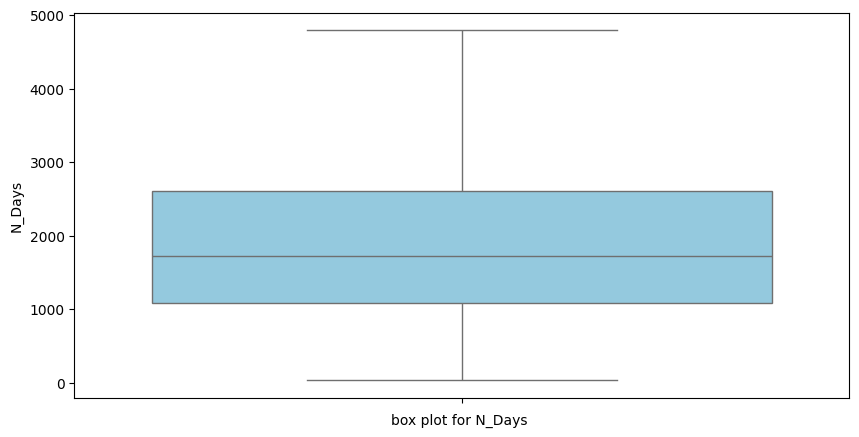

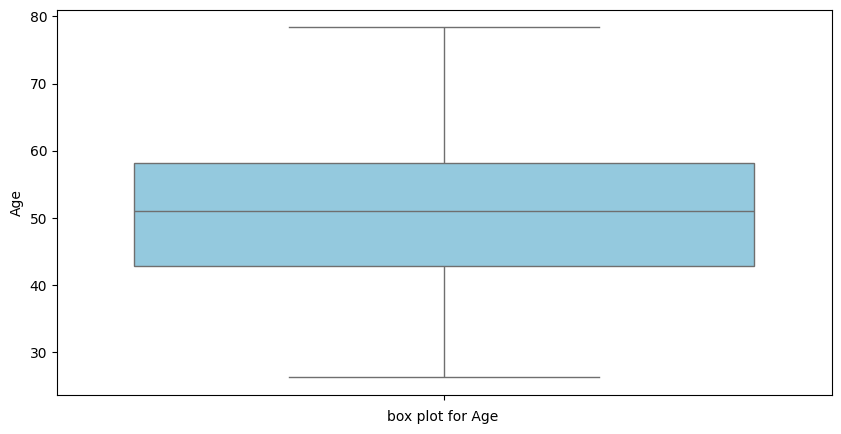

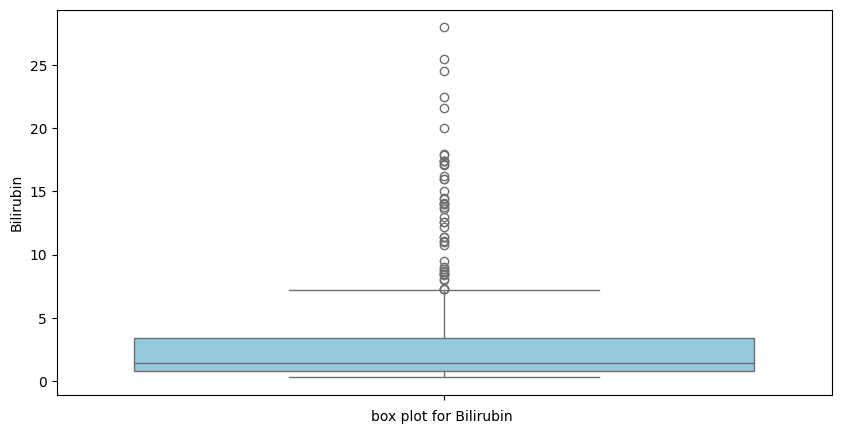

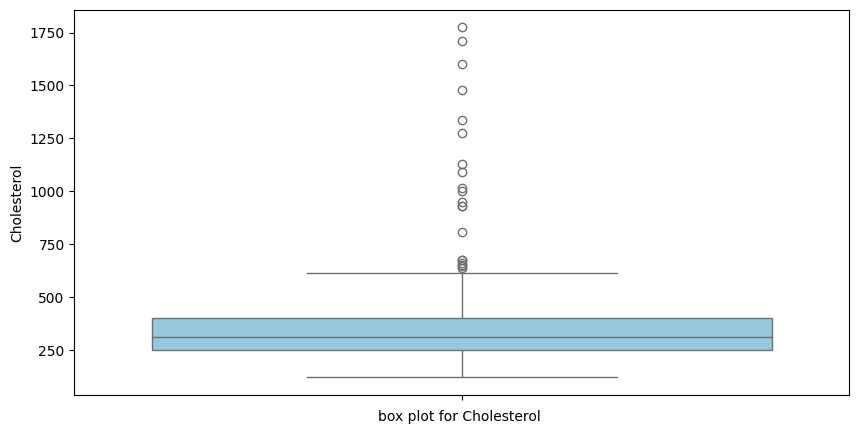

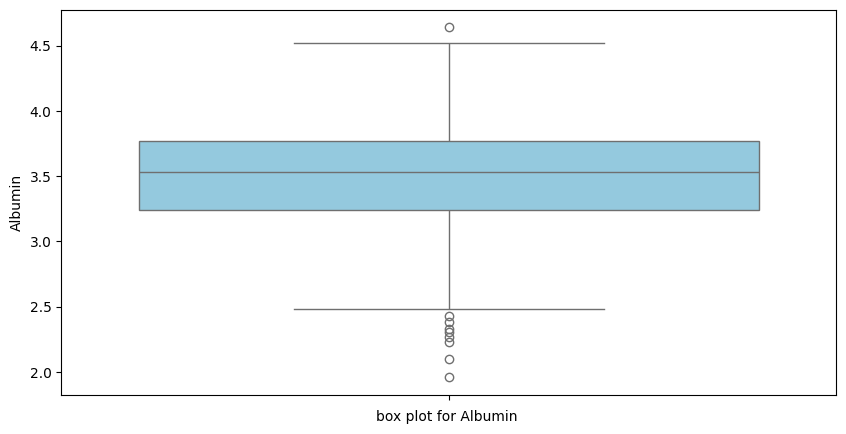

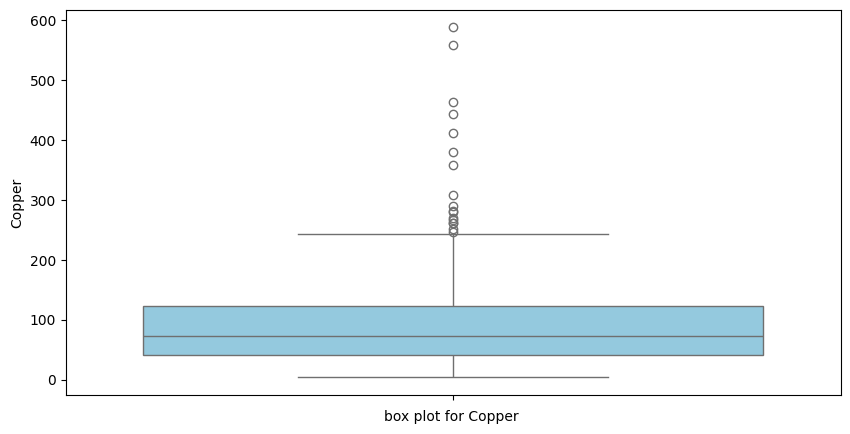

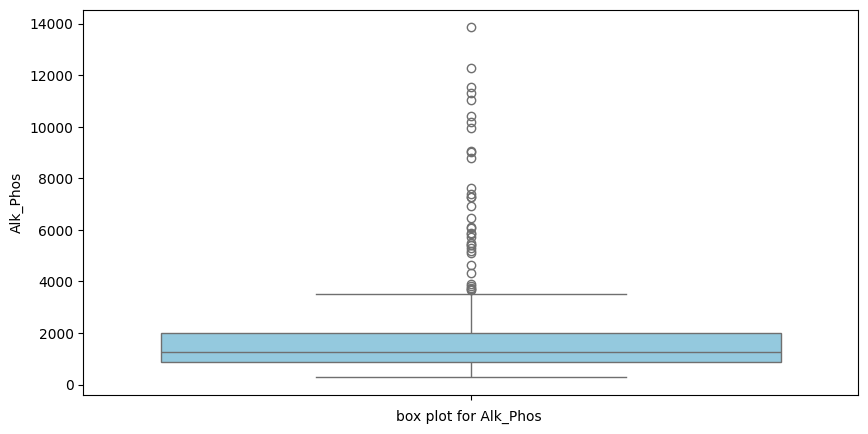

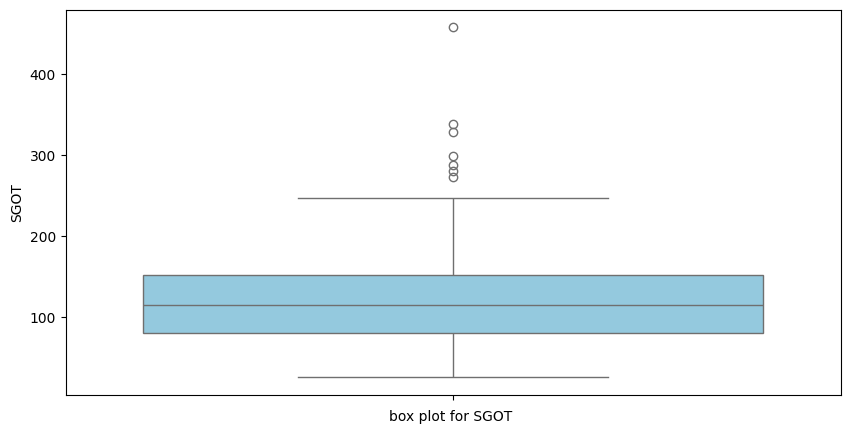

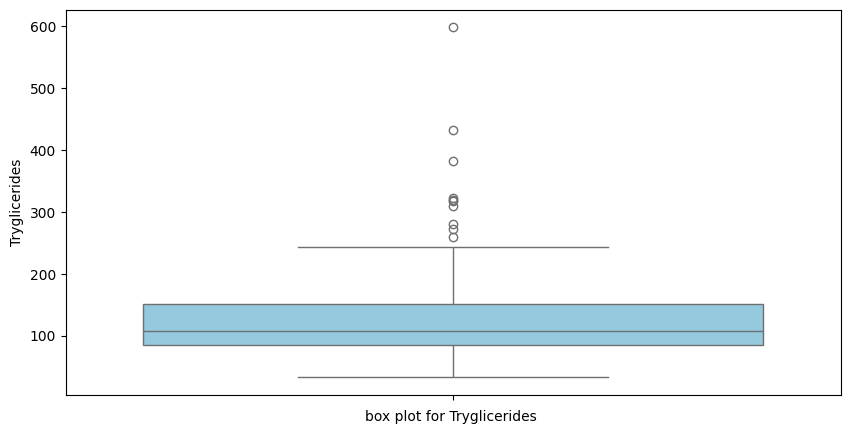

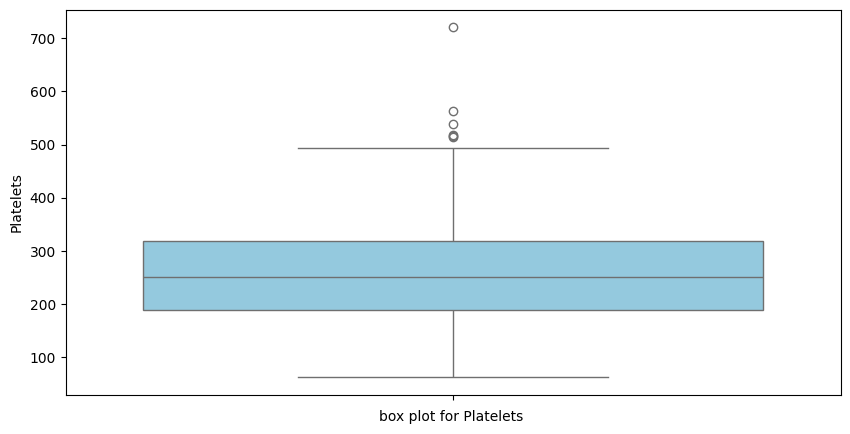

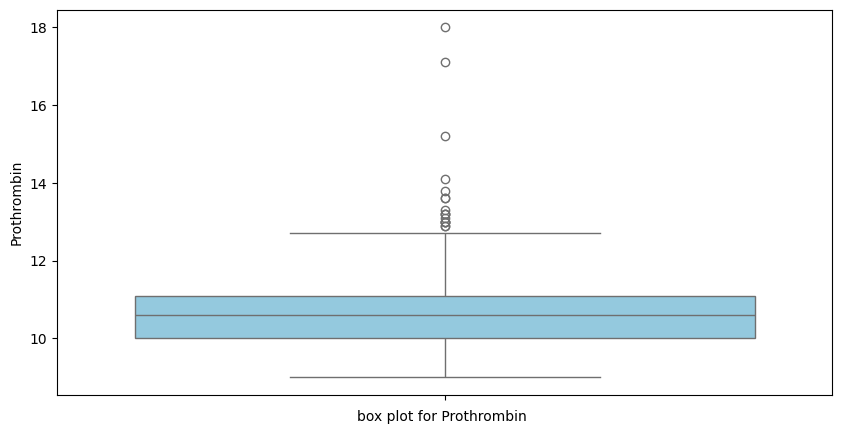

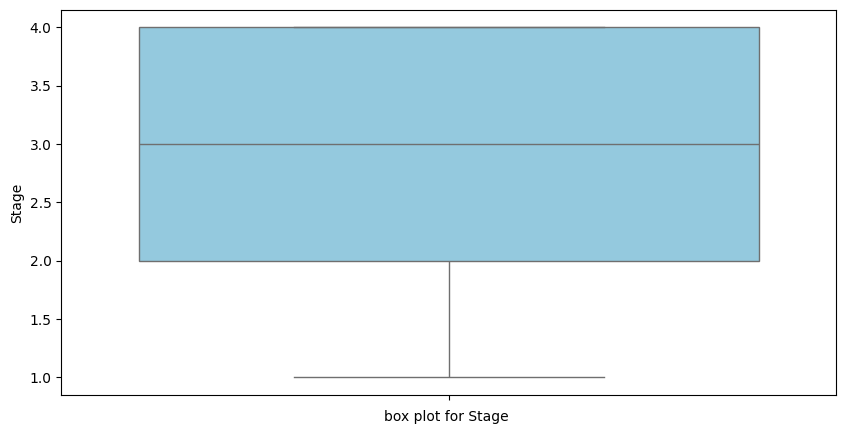

In [ ]:
for col in df.select_dtypes(include='number').columns:
  plt.figure(figsize=(10,5))
  sns.boxplot(y = df[col],color = "skyblue")
  plt.xlabel(f"box plot for {col} ")
  plt.show()

In [ ]:
for col in df.select_dtypes(include='number').columns:
    if df[col].isnull().sum() > 0:
        mode_value = df[col].median()
        df[col].fillna(mode_value, inplace=True)

/tmp/ipython-input-73-2373384899.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


Filling the missing values of numerical column

In [ ]:
columns = ["Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin"]
for col in columns:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df[col] = np.where(df[col] < lower_bound, lower_bound,np.where(df[col] > upper_bound, upper_bound,df[col]))

Handling outliers by using IQR

In [ ]:
for col in df.select_dtypes(include='object').columns:
  print(df[col].value_counts())
  print("-----------------------------------------------------")

Status
C     232
D     161
CL     25
Name: count, dtype: int64
-----------------------------------------------------
Drug
D-penicillamine    264
Placebo            154
Name: count, dtype: int64
-----------------------------------------------------
Sex
F    374
M     44
Name: count, dtype: int64
-----------------------------------------------------
Ascites
N    394
Y     24
Name: count, dtype: int64
-----------------------------------------------------
Hepatomegaly
Y    266
N    152
Name: count, dtype: int64
-----------------------------------------------------
Spiders
N    328
Y     90
Name: count, dtype: int64
-----------------------------------------------------
Edema
N    354
S     44
Y     20
Name: count, dtype: int64
-----------------------------------------------------


/tmp/ipython-input-76-3243298242.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Status', data=df,palette='Set2')


Status distribution:
Status
C     55.502392
D     38.516746
CL     5.980861
Name: proportion, dtype: float64


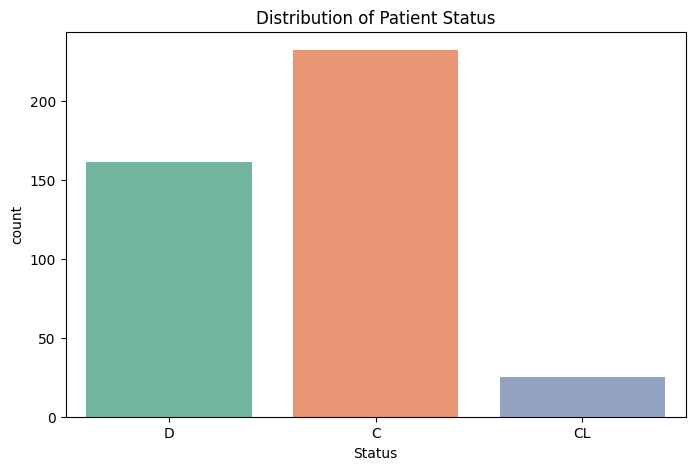

In [ ]:
status_counts = df['Status'].value_counts(normalize=True) * 100
print("Status distribution:")
print(status_counts)

plt.figure(figsize=(8,5))
sns.countplot(x='Status', data=df,palette='Set2')
plt.title('Distribution of Patient Status')
plt.show()

From the above diagram we conclude that the class 0 and 2 has high values where as class 1 has less values that might leads to the data imbalance at the end    
The status variable has three categories:

C: Censored (alive at end of study) - ~60%

D: Death - ~38%

CL: Censored due to liver transplantation - ~5%

Most patients were alive at the end of the study period

In [ ]:
print(df.groupby('Status')[['Bilirubin', 'Albumin', 'Prothrombin']].mean())

        Bilirubin   Albumin  Prothrombin
Status                                  
C        1.503017  3.593459    10.411638
CL       3.072000  3.493250    10.360000
D        3.827950  3.369177    11.126708


Key Insights from Grouped Averages  
 Status----------Bilirubin---------Albumin----------Prothrombin  
 0 (Deceased)---->-Lowest----------Highest-----------Moderate  
 1 (Transplant)------Medium------Moderate----------Lowest  
 2 (Censored / Alive)  Highest------Lowest----------Highest  






In [ ]:
pd.crosstab(df['Sex'], df['Status'], normalize='index') * 100


Status,C,CL,D
Sex,,,
F,57.486631,5.882353,36.631016
M,38.636364,6.818182,54.545455


There is a significant difference in survival outcome between Male and Female patients.

Males have a much higher death rate.

So, Sex could be an important feature for predicting Status.

In [ ]:
pd.crosstab(df['Ascites'], df['Status'], normalize='index') * 100

Status,C,CL,D
Ascites,,,
N,58.629442,6.345178,35.025381
Y,4.166667,0.000000,95.833333


where C (Censored - Alive),  CL (Transplanted), 	D (Died)


The people who has ascites with liver transplantation plantation are died the most compared to the people who has no Ascites and no transplantation

In [ ]:
pd.crosstab(df['Hepatomegaly'], df['Status'], normalize='index') * 100

Status,C,CL,D
Hepatomegaly,,,
N,71.052632,4.605263,24.342105
Y,46.616541,6.766917,46.616541


Patients with liver enlargement have almost double the death rate compared to those without it.

Hepatomegaly = Y	    Higher chance of death (50%),     
Hepatomegaly = N      Higher survival rate (68.4%)

In [ ]:
pd.crosstab(df['Spiders'], df['Status'], normalize='index') * 100

Status,C,CL,D
Spiders,,,
N,60.670732,6.097561,33.231707
Y,36.666667,5.555556,57.777778


Patients with spider angiomata have a significantly higher death rate than those without.



Spiders = Y	        50.8% death rate — high risk      
Spiders = N	        60.5% survival rate — lower risk

In [ ]:
pd.crosstab(df['Edema'], df['Status'], normalize='index') * 100

Status,C,CL,D
Edema,,,
N,61.016949,6.214689,32.768362
S,34.090909,6.818182,59.090909
Y,5.000000,0.000000,95.000000


Edema = N (No edema)
Majority survived (61%)

Only 33% died



Edema = S (Some edema, controlled)
Survival drops to 34%

Death rate increases to 59%



Edema = Y (Severe edema not controlled)
Almost all patients died (95%)

Only 5% survived

0% were transplanted

In [ ]:
pd.crosstab(df['Drug'], df['Status'], normalize='index') * 100

Status,C,CL,D
Drug,,,
D-penicillamine,55.681818,6.060606,38.257576
Placebo,55.194805,5.844156,38.961039


In [ ]:
# Stage distribution
stage_counts = df['Stage'].value_counts(normalize=True) * 100
print("\nDisease stage distribution:")
print(stage_counts)


Disease stage distribution:
Stage
3.0    38.516746
4.0    34.449761
2.0    22.009569
1.0     5.023923
Name: proportion, dtype: float64


"Most patients in this study were already in the later stages of cirrhosis when diagnosed

/tmp/ipython-input-85-860172662.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Status", y=col, data=df, palette=custom_colors)


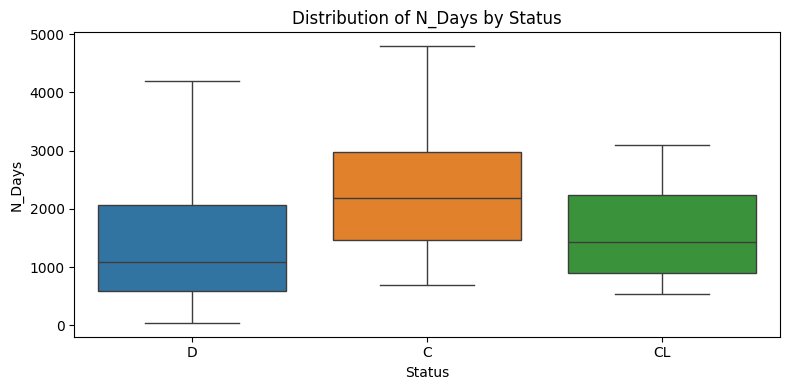

/tmp/ipython-input-85-860172662.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Status", y=col, data=df, palette=custom_colors)


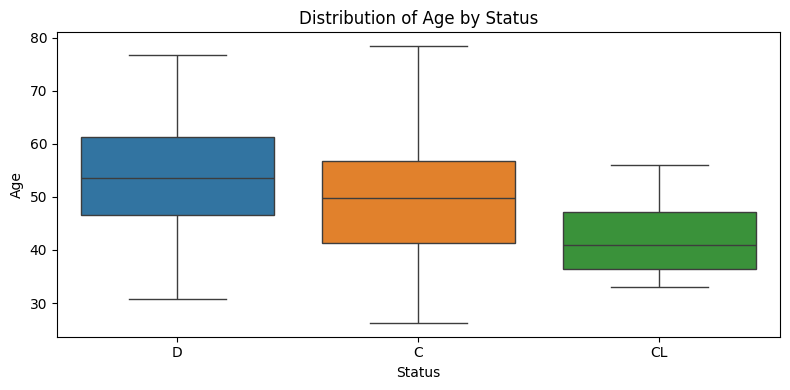

/tmp/ipython-input-85-860172662.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Status", y=col, data=df, palette=custom_colors)


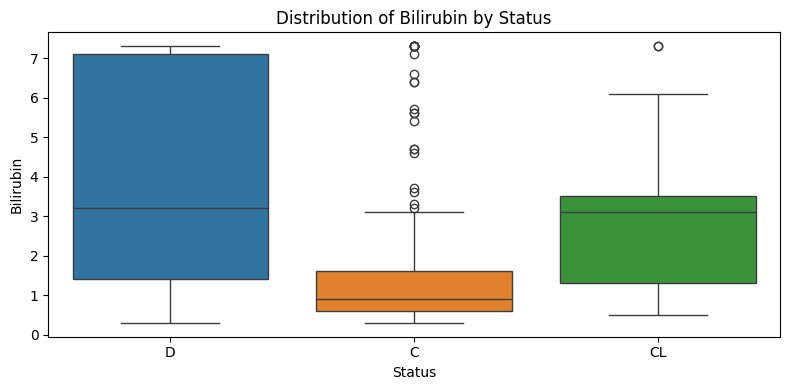

/tmp/ipython-input-85-860172662.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Status", y=col, data=df, palette=custom_colors)


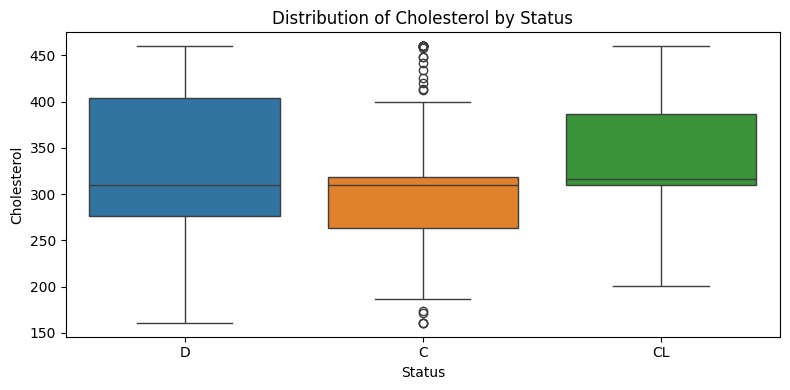

/tmp/ipython-input-85-860172662.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Status", y=col, data=df, palette=custom_colors)


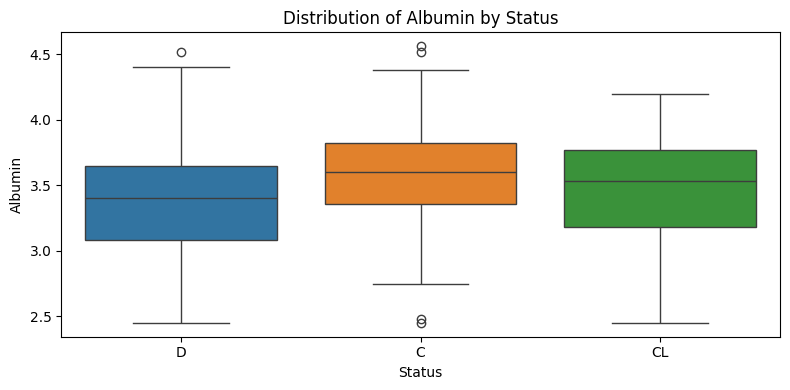

/tmp/ipython-input-85-860172662.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Status", y=col, data=df, palette=custom_colors)


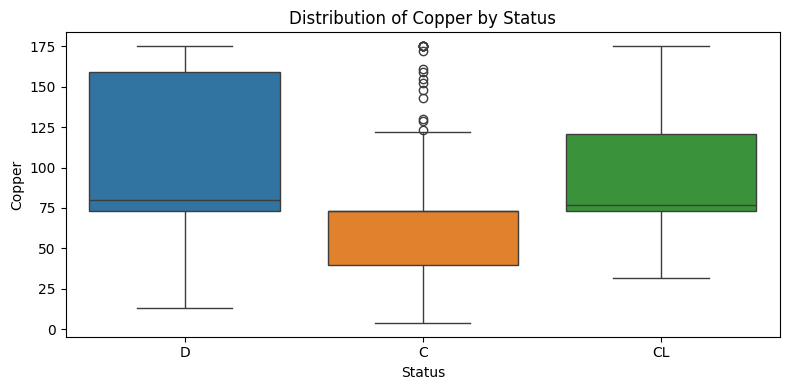

/tmp/ipython-input-85-860172662.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Status", y=col, data=df, palette=custom_colors)


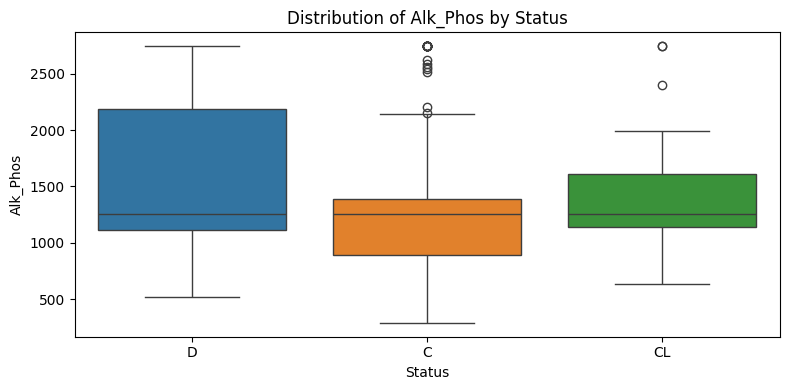

/tmp/ipython-input-85-860172662.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Status", y=col, data=df, palette=custom_colors)


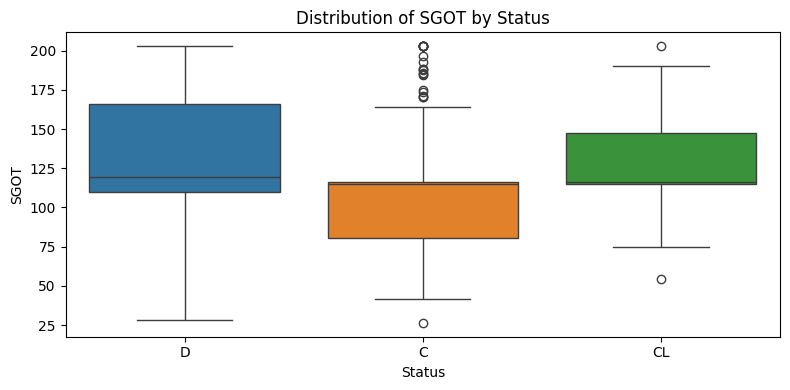

/tmp/ipython-input-85-860172662.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Status", y=col, data=df, palette=custom_colors)


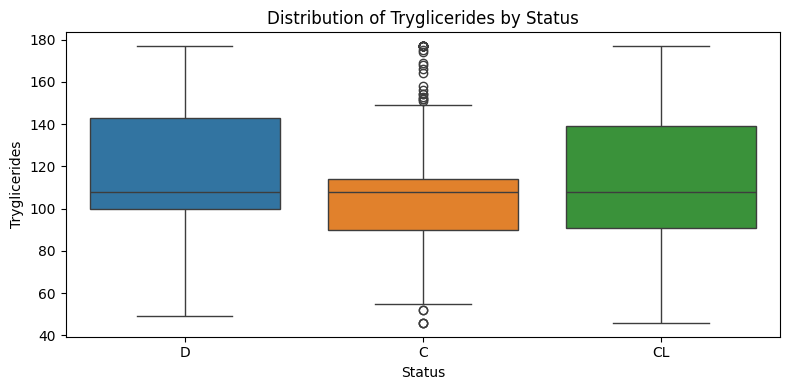

/tmp/ipython-input-85-860172662.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Status", y=col, data=df, palette=custom_colors)


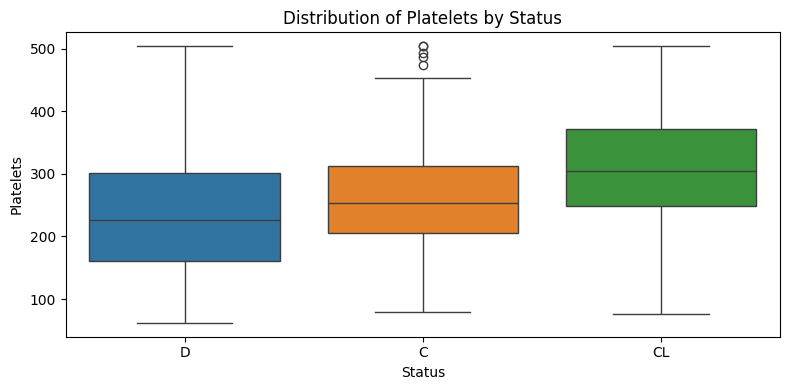

/tmp/ipython-input-85-860172662.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Status", y=col, data=df, palette=custom_colors)


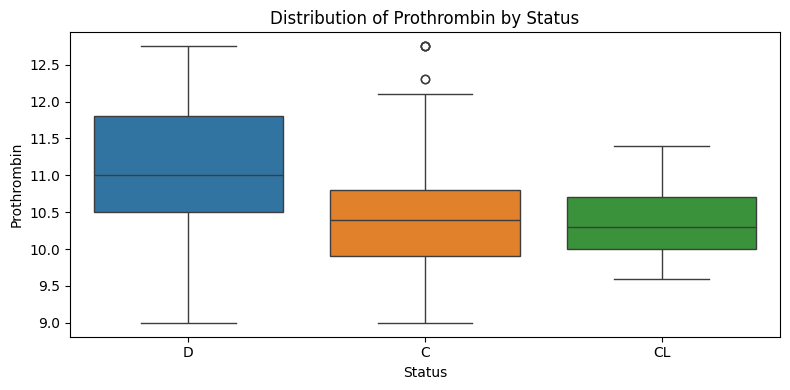

/tmp/ipython-input-85-860172662.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Status", y=col, data=df, palette=custom_colors)


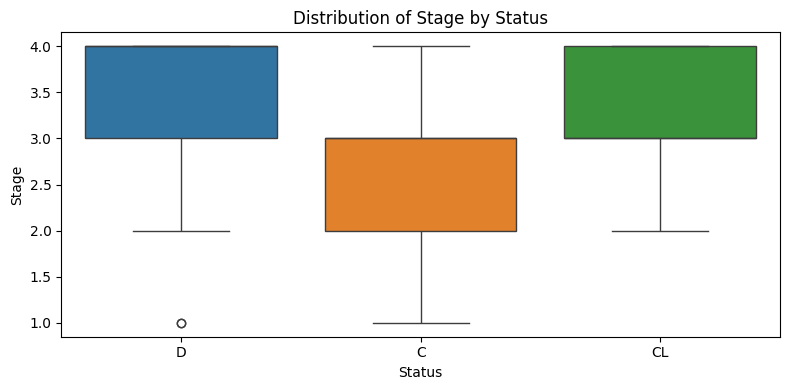

In [ ]:
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x="Status", y=col, data=df, palette=custom_colors)
    plt.title(f'Distribution of {col} by Status')
    plt.tight_layout()
    plt.show()


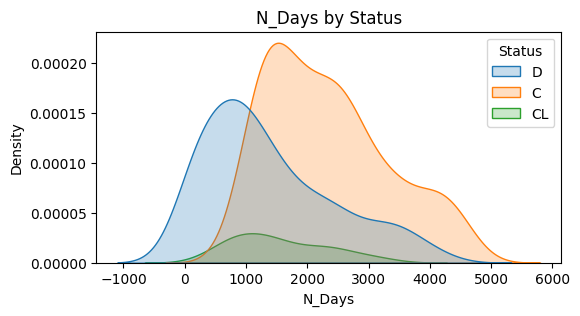

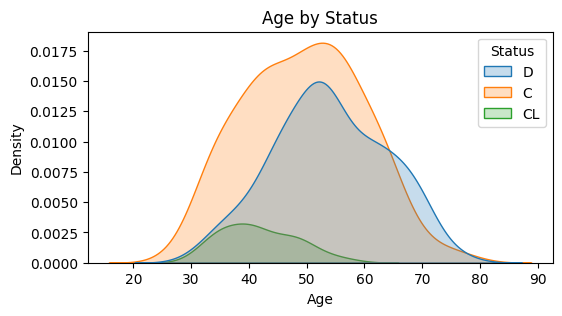

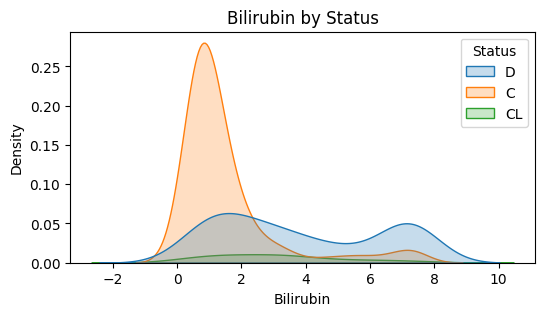

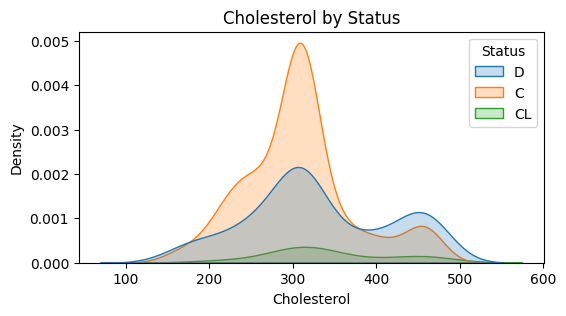

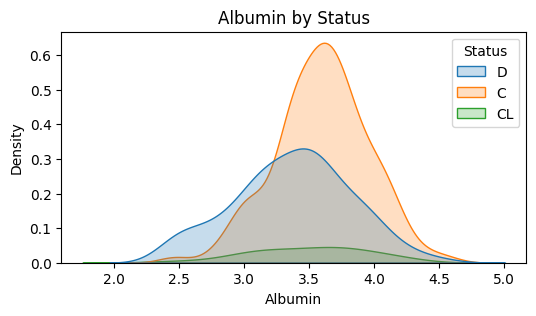

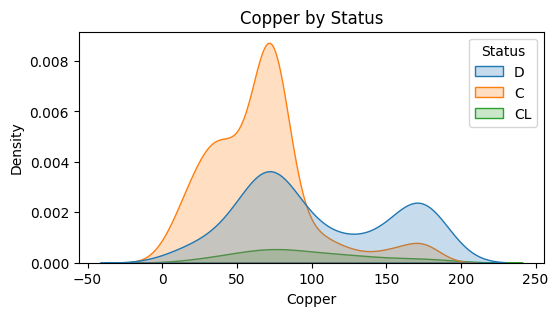

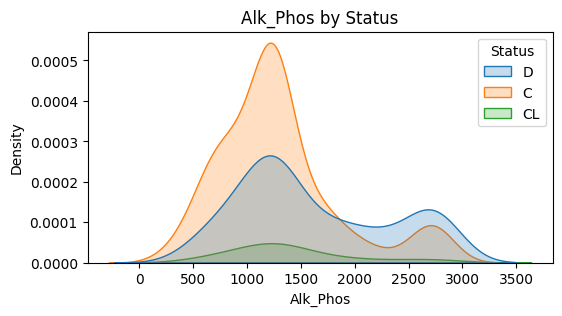

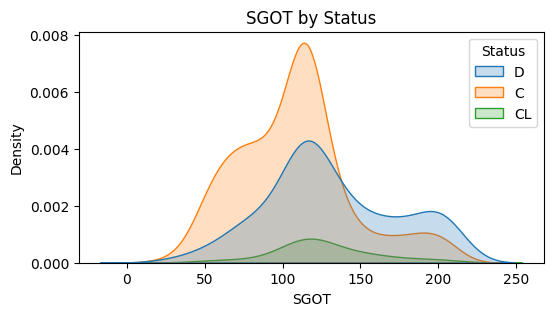

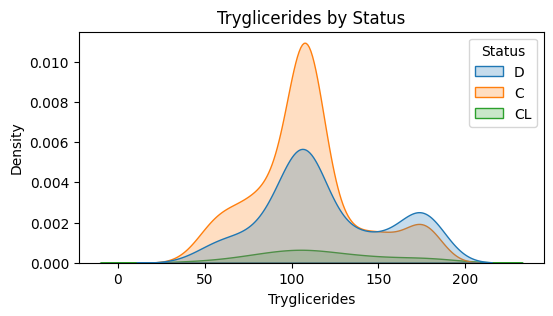

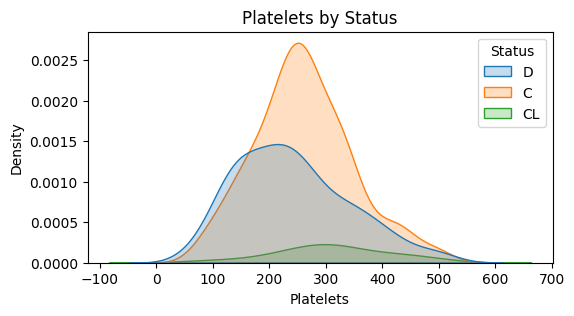

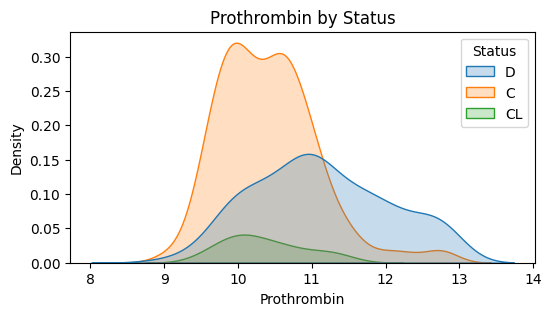

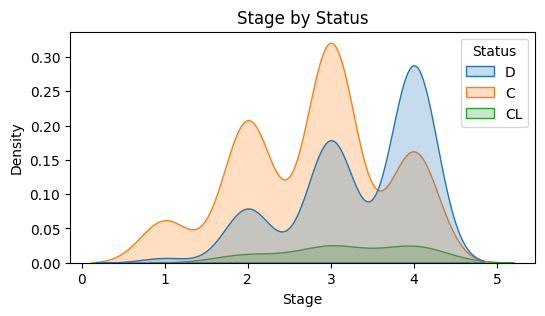

In [ ]:
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 3))
    sns.kdeplot(data=df, x=col, hue='Status', fill=True)
    plt.title(f'{col} by Status')
    plt.show()


1. Patients who died (D) tend to have shorter survival times than those who are alive (CL) or censored (C

2. Patients who were censored (C) or cured (CL) tend to cluster in the 40–60 age range

3. The worse the bilirubin, the higher the mortality risk—it's a strong red flag in the data.
4. Higher cholesterol clusters most heavily in the censored group, while deceased patients trend slightly lower   
5. Patients who were cured or censored (CL & C) tend to have higher albumin levels  
6. Most of the patients who were censored had lower copper levels, around 50, while those who passed away had copper levels that varied a lot—and some were really high, even going past 200.   
7. Higher alkaline phosphatase levels appear more common in patients who survived, while those who died tend to have lower values.  
8. More stable SGOT levels seem to favor survival, while fluctuating or extreme values show up more in deceased patients.
9. ensored patients had steady triglyceride levels around 100, while deceased patients showed a broader, higher spread near 120. Cured patients had little visible pattern.
10. Higher platelet counts are more common among survivors, while lower counts appear more frequently in deceased patients.

11. The higher the prothrombin, the greater the chance of mortality—it’s a subtle but telling indicator

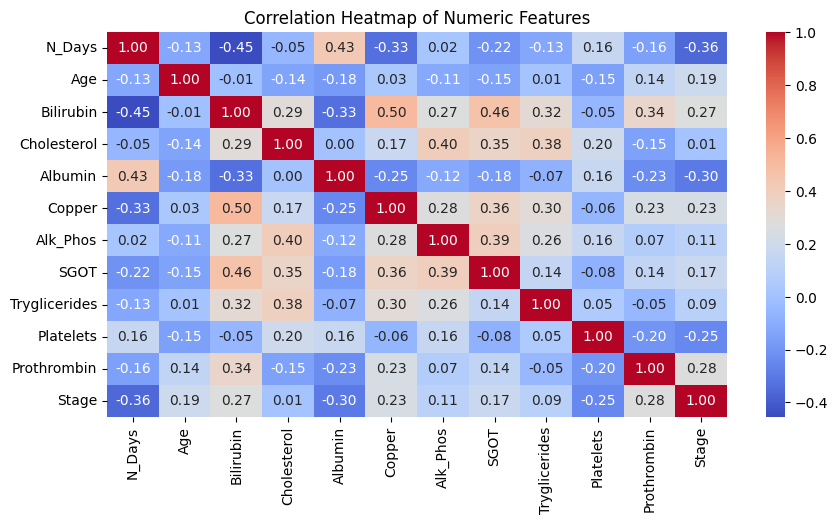

In [ ]:
# Compute correlations (drop non-numerical columns first)
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [ ]:
df.columns

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [ ]:
columns = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets"]
df[columns].skew()

,0
N_Days,0.472602
Age,0.086850
Bilirubin,1.148525
Cholesterol,0.395628
Albumin,-0.306507
Copper,0.801801
Alk_Phos,0.859327
SGOT,0.459079
Tryglicerides,0.443641
Platelets,0.399911


In [ ]:
from sklearn.preprocessing import StandardScaler,RobustScaler
scale = ["N_Days","Age","Cholesterol","Albumin","SGOT","Tryglicerides","Platelets"]
scaler = StandardScaler()
df[scale] = scaler.fit_transform(df[scale])
print(df[scale].describe().loc[['mean', 'std']])

            N_Days           Age   Cholesterol       Albumin          SGOT  \
mean  1.019918e-16 -8.924281e-16 -1.232401e-16 -7.989356e-16 -3.314733e-16   
std   1.001198e+00  1.001198e+00  1.001198e+00  1.001198e+00  1.001198e+00   

      Tryglicerides     Platelets  
mean   1.147408e-16  7.649384e-17  
std    1.001198e+00  1.001198e+00  


In [ ]:
robust=['Copper', 'Alk_Phos', 'Prothrombin']
for col in robust:
  df[col]=RobustScaler().fit_transform(df[[col]])


In [ ]:
df.columns

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_col=['Drug','Sex','Ascites',	'Hepatomegaly',	'Spiders',	'Edema',"Status"]
labels=LabelEncoder()
for col in label_col:
  df[col]=labels.fit_transform(df[col])

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(["Stage","Stage"], axis=1)
y = df[["Stage","Stage"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42)

In [ ]:
X_train.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
336,0.333727,2,0,0.503938,0,0,1,0,0,1.8,-0.115206,0.336372,0.000000,0.000000,-0.076050,-0.147963,-1.222594,-0.545455
31,2.361187,0,1,0.311877,0,0,1,0,0,1.8,-0.748727,-0.390026,0.565657,2.148952,-0.877559,1.358237,0.318537,0.000000
84,1.305313,2,1,-0.337774,0,0,1,0,0,2.1,-0.748727,-0.051040,-0.303030,1.136659,-0.694514,-0.870939,-0.329801,0.818182
287,-0.771090,1,1,-0.173000,0,0,1,0,1,7.3,-0.108537,0.941703,0.686869,-0.899494,-0.018692,1.926828,0.446079,-0.909091
317,-0.215509,0,0,-0.741838,0,0,1,0,0,0.7,-0.115206,0.433225,0.000000,0.000000,-0.076050,-0.147963,0.531107,-1.000000


In [ ]:
y_train.head()

,Stage,Stage
336,3.0,3.0
31,4.0,4.0
84,4.0,4.0
287,2.0,2.0
317,2.0,2.0


##LogisticRegression

Applying Sampling

In [ ]:
import pandas as pd
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Print the current encoded value counts
print("Original class distribution:\n", df['Status'].value_counts())

# Step 1: If Status is already encoded, skip this
# But if it's categorical (like 'D', 'C', 'CL'), use LabelEncoder
le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])  # Only if not already numbers

# Step 2: Get class-specific DataFrames
class_dfs = {}
for label in df['Status'].unique():
    class_subset = df[df['Status'] == label]
    class_dfs[label] = class_subset

# Step 3: Upsample all classes to match the largest class
max_count = max(len(cls_df) for cls_df in class_dfs.values())

upsampled_dfs = []
for label, cls_df in class_dfs.items():
    if len(cls_df) < 2:
        print(f"Skipping class {label} due to too few samples.")
        continue
    cls_df_up = resample(cls_df, replace=True, n_samples=max_count, random_state=42)
    upsampled_dfs.append(cls_df_up)

# Combine upsampled data
df_balanced = pd.concat(upsampled_dfs).sample(frac=1, random_state=42).reset_index(drop=True)

# Step 4: Separate features and target
X = df_balanced.drop(columns=['Status'])
y = df_balanced['Status']

# Step 5: Train-test split with stratify (only if y has >1 class)
if len(set(y)) < 2:
    raise ValueError("After upsampling, only one class remains — can't split stratified.")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 6: Print final distribution
print("After upsampling:\n", pd.Series(y_train).value_counts())


Original class distribution:
 Status
0    232
2    161
1     25
Name: count, dtype: int64
After upsampling:
 Status
0    163
1    162
2    162
Name: count, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the model
model = LogisticRegression(
    penalty='l2',
    C=1.0,
    solver='lbfgs',
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

# Print results
print("Accuracy:", test_accuracy)
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")


Accuracy: 0.6842105263157895
Train Accuracy: 0.71
Test Accuracy: 0.68


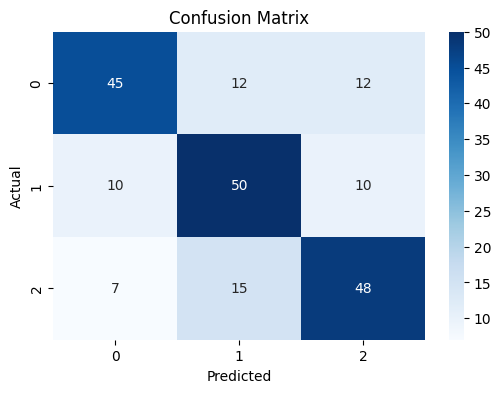

Accuracy: 0.9667


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting it
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
accuracy = (10 + 10 + 9) / 30  # = 29 / 30
print("Accuracy:", round(29/30, 4))

In [ ]:

cm = confusion_matrix(y_test, y_pred)
cm

array([[45, 12, 12],
       [10, 50, 10],
       [ 7, 15, 48]])

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


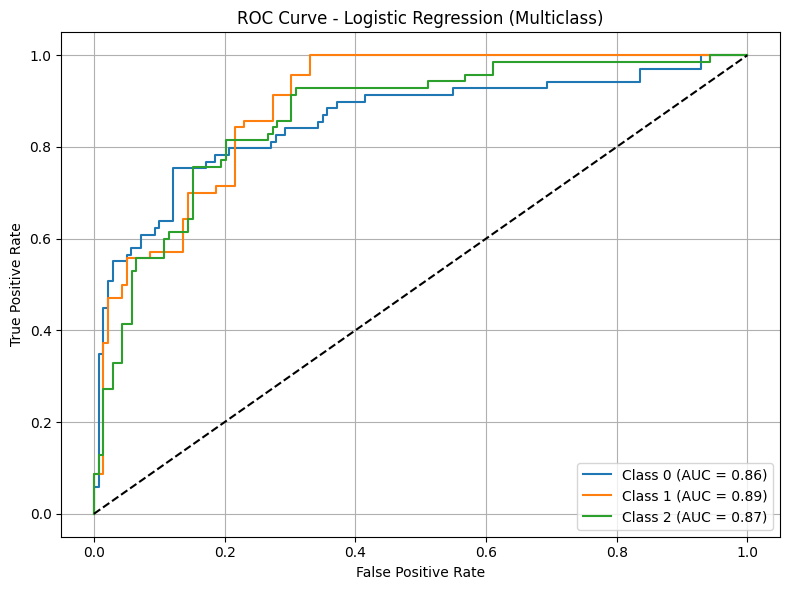

Macro-average AUC     : 0.8721
Weighted-average AUC : 0.8722


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Example split (ensure X and y are defined before this step)
# X = df.drop(columns='target')
# y = df['target']
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 1. Train Logistic Regression model
model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# 2. Binarize true labels
classes = model.classes_
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# 3. Predict probabilities
y_score = model.predict_proba(X_test)

# 4. ROC and AUC per class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 5. Plot ROC Curve
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {classes[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression (Multiclass)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Print macro and weighted AUC
macro_auc = roc_auc_score(y_test_bin, y_score, average='macro', multi_class='ovr')
weighted_auc = roc_auc_score(y_test_bin, y_score, average='weighted', multi_class='ovr')

print(f"Macro-average AUC     : {macro_auc:.4f}")
print(f"Weighted-average AUC : {weighted_auc:.4f}")


##Decission Tree

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Assuming X and y are already defined before this code

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Define the Decision Tree model
dt = DecisionTreeClassifier(random_state=10)

# Hyperparameter grid for Decision Tree
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'criterion': ['gini', 'entropy']
}

# Cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=40)

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=cv_strategy,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Output best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Predict using best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Train accuracy
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))

# Evaluation results
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(f"Train Accuracy: {train_accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))


Fitting 10 folds for each of 72 candidates, totalling 720 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Score: 0.8971938775510205
Test Accuracy: 0.9138755980861244
Train Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0     0.9355    0.8406    0.8855        69
           1     0.8861    1.0000    0.9396        70
           2     0.9265    0.9000    0.9130        70

    accuracy                         0.9139       209
   macro avg     0.9160    0.9135    0.9127       209
weighted avg     0.9159    0.9139    0.9128       209



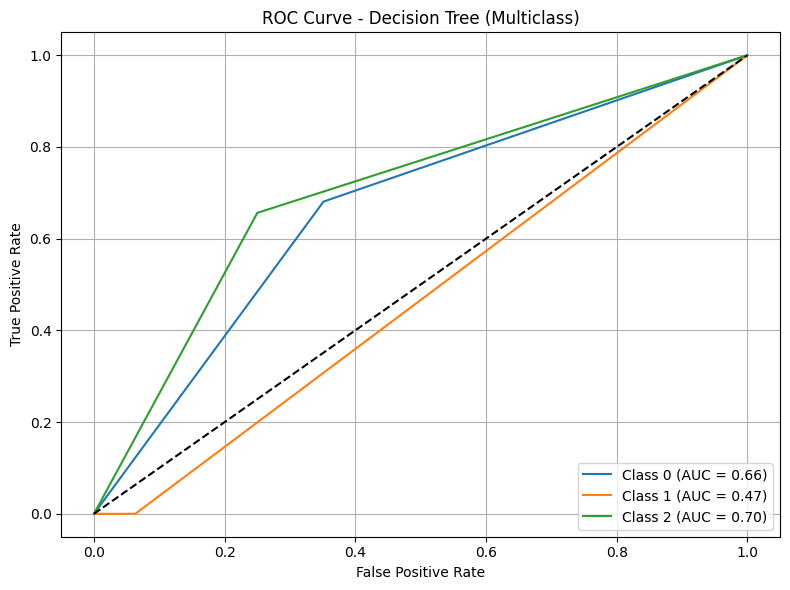

Macro-average AUC     : 0.6121
Weighted-average AUC : 0.6677


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Example split (ensure X and y are defined before this step)
# X = df.drop(columns='target')
# y = df['target']
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 1. Train Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 2. Binarize true labels
classes = model.classes_
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# 3. Predict probabilities
y_score = model.predict_proba(X_test)

# 4. ROC and AUC per class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 5. Plot ROC Curve
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {classes[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree (Multiclass)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Print macro and weighted AUC
macro_auc = roc_auc_score(y_test_bin, y_score, average='macro', multi_class='ovr')
weighted_auc = roc_auc_score(y_test_bin, y_score, average='weighted', multi_class='ovr')

print(f"Macro-average AUC     : {macro_auc:.4f}")
print(f"Weighted-average AUC : {weighted_auc:.4f}")


##RandomForest

In [ ]:
import pandas as pd
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Print the current encoded value counts
print("Original class distribution:\n", df['Status'].value_counts())

# Step 1: If Status is already encoded, skip this
# But if it's categorical (like 'D', 'C', 'CL'), use LabelEncoder
le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])  # Only if not already numbers

# Step 2: Get class-specific DataFrames
class_dfs = {}
for label in df['Status'].unique():
    class_subset = df[df['Status'] == label]
    class_dfs[label] = class_subset

# Step 3: Upsample all classes to match the largest class
max_count = max(len(cls_df) for cls_df in class_dfs.values())

upsampled_dfs = []
for label, cls_df in class_dfs.items():
    if len(cls_df) < 2:
        print(f"Skipping class {label} due to too few samples.")
        continue
    cls_df_up = resample(cls_df, replace=True, n_samples=max_count, random_state=42)
    upsampled_dfs.append(cls_df_up)

# Combine upsampled data
df_balanced = pd.concat(upsampled_dfs).sample(frac=1, random_state=42).reset_index(drop=True)

# Step 4: Separate features and target
X = df_balanced.drop(columns=['Status'])
y = df_balanced['Status']

# Step 5: Train-test split with stratify (only if y has >1 class)
if len(set(y)) < 2:
    raise ValueError("After upsampling, only one class remains — can't split stratified.")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 6: Print final distribution
print("After upsampling:\n", pd.Series(y_train).value_counts())


Original class distribution:
 Status
0    232
2    161
1     25
Name: count, dtype: int64
After upsampling:
 Status
0    163
1    162
2    162
Name: count, dtype: int64


MAKING USE OF GRID SEARCH CV

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Define the model with fixed seed
rf = RandomForestClassifier(random_state=1)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

# Stable cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=1000)

# GridSearch with locked-down randomness
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=cv_strategy,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit model
grid_search.fit(X_train, y_train)

# Output best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Predict on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


# Accuracy0
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(f"Train Accuracy: {train_accuracy:.2f}")
print(classification_report(y_test, y_pred, digits=4))


Fitting 10 folds for each of 12 candidates, totalling 120 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9281462585034014
Test Accuracy: 0.937799043062201
Train Accuracy: 0.86
              precision    recall  f1-score   support

           0     0.9531    0.8841    0.9173        69
           1     0.9589    1.0000    0.9790        70
           2     0.9028    0.9286    0.9155        70

    accuracy                         0.9378       209
   macro avg     0.9383    0.9375    0.9373       209
weighted avg     0.9382    0.9378    0.9374       209



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))

[[61  1  7]
 [ 0 70  0]
 [ 3  2 65]]
              precision    recall  f1-score   support

           0     0.9531    0.8841    0.9173        69
           1     0.9589    1.0000    0.9790        70
           2     0.9028    0.9286    0.9155        70

    accuracy                         0.9378       209
   macro avg     0.9383    0.9375    0.9373       209
weighted avg     0.9382    0.9378    0.9374       209



ROC AND AUC CURVE

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best Parameters: {'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 50}
Best Cross-Validation Score: 0.9178571428571429
Test Accuracy: 0.8947368421052632
Train Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0     0.8889    0.8116    0.8485        69
           1     0.9589    1.0000    0.9790        70
           2     0.8356    0.8714    0.8531        70

    accuracy                         0.8947       209
   macro avg     0.8945    0.8943    0.8936       209
weighted avg     0.8945    0.8947    0.8938       209



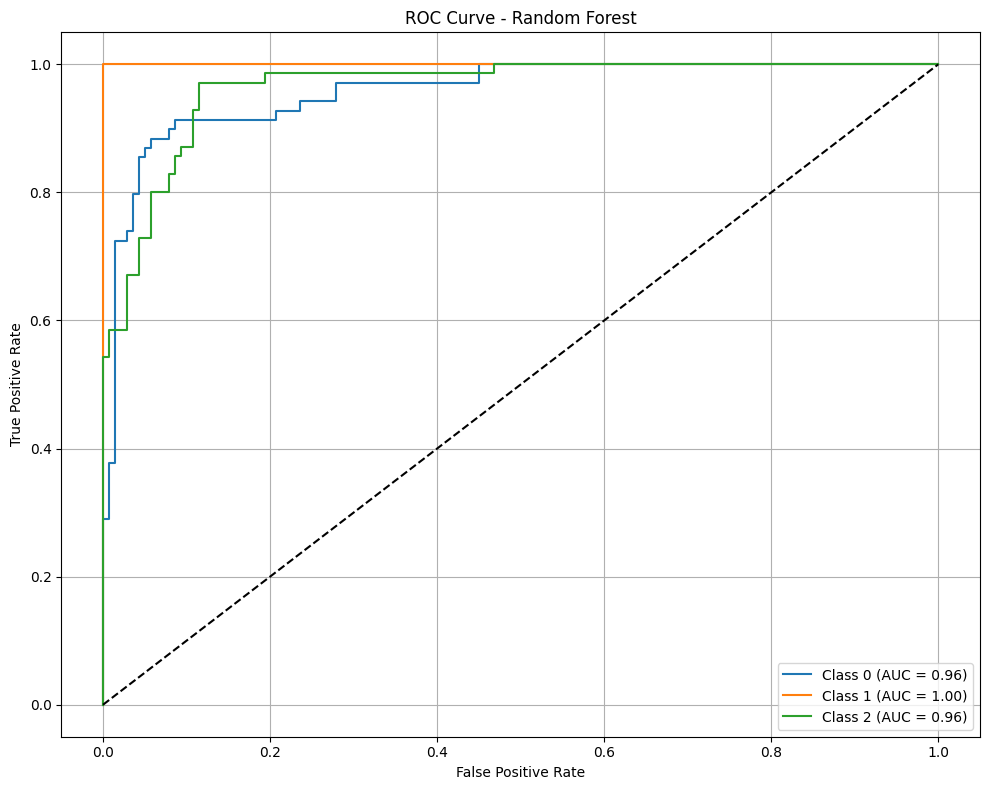

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score,
    roc_curve, auc
)
from sklearn.preprocessing import LabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

# Assuming X and y are already defined before this code

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Define the model
rf = RandomForestClassifier(random_state=10)

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, 15],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 5],
}

# Cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=40)

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=cv_strategy,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Output best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Best model
best_model = grid_search.best_estimator_

# Predict
y_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)
print(f"Train Accuracy: {train_accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

# ---------- ROC and AUC ----------
# Binarize labels for multiclass ROC
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)
y_score = best_model.predict_proba(X_test)

# Handle binary classification case
if y_score.shape[1] == 1:
    y_score = np.hstack([1 - y_score, y_score])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i, class_label in enumerate(lb.classes_):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()


##Sample testing

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Step 1: Create the model instance
rf = RandomForestClassifier(random_state=42)

# Step 2: Fit the model on the training data
rf.fit(X_train, y_train)

# Step 3: Predict on the test data
y_pred = rf.predict(X_test)

# Step 4: Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual': y_test.reset_index(drop=True),
    'Predicted': pd.Series(y_pred)
})

# Step 5: Display the first 10 rows
print(comparison_df.head(10))

# Step 6: Count correct and incorrect predictions
correct = (comparison_df['Actual'] == comparison_df['Predicted']).sum()
incorrect = (comparison_df['Actual'] != comparison_df['Predicted']).sum()

print(f"Correct Predictions: {correct}")
print(f"Incorrect Predictions: {incorrect}")

# Optional: Accuracy
accuracy = correct / len(y_test)
print(f"Accuracy: {accuracy:.2f}")


   Actual  Predicted
0       0          1
1       0          0
2       1          1
3       1          1
4       0          0
5       0          2
6       1          1
7       0          0
8       1          1
9       1          1
Correct Predictions: 191
Incorrect Predictions: 18
Accuracy: 0.91


[[59  1  9]
 [ 0 70  0]
 [ 6  2 62]]


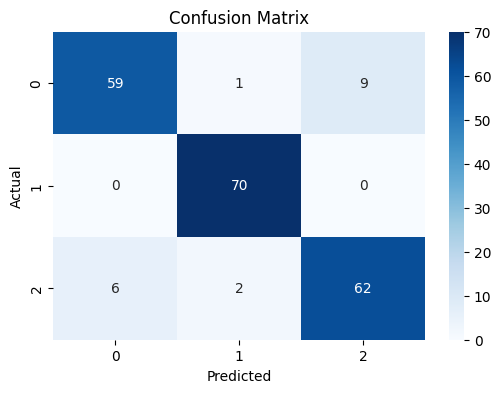

Accuracy: 0.9667


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plotting it
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
accuracy = (10 + 10 + 9) / 30  # = 29 / 30
print("Accuracy:", round(29/30, 4))

FINDING NULL ACCURACY

In [ ]:
import numpy as np

# Assuming y_test is your true label set
most_common_class = np.bincount(y_test).argmax()
null_predictions = [most_common_class] * len(y_test)

# Null accuracy = proportion of y_test that belongs to the most frequent class
from sklearn.metrics import accuracy_score
null_accuracy = accuracy_score(y_test, null_predictions)

print("Null Accuracy:", round(null_accuracy, 4))

Null Accuracy: 0.3349


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Average CV accuracy: {:.4f}".format(scores.mean()))

Cross-validation scores: [0.84285714 0.85611511 0.8705036  0.82014388 0.76258993]
Average CV accuracy: 0.8304


SVM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Assuming X and y are already defined before this code

# Standardize the features (very important for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Define the SVM model
svm = SVC(probability=True, random_state=10)

# Hyperparameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=40)

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    cv=cv_strategy,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Output best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Predict using best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Train accuracy
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))

# Evaluation results
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(f"Train Accuracy: {train_accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))


Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Score: 0.8850765306122449
Test Accuracy: 0.8947368421052632
Train Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0     0.9123    0.7536    0.8254        69
           1     0.9589    1.0000    0.9790        70
           2     0.8228    0.9286    0.8725        70

    accuracy                         0.8947       209
   macro avg     0.8980    0.8941    0.8923       209
weighted avg     0.8979    0.8947    0.8926       209



[[52  2 15]
 [ 0 70  0]
 [ 5  0 65]]


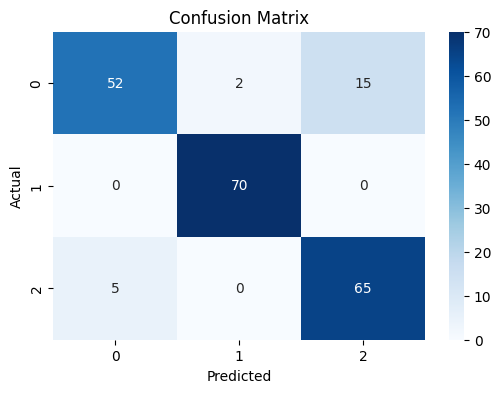

Accuracy: 0.9667


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plotting it
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
accuracy = (10 + 10 + 9) / 30  # = 29 / 30
print("Accuracy:", round(29/30, 4))

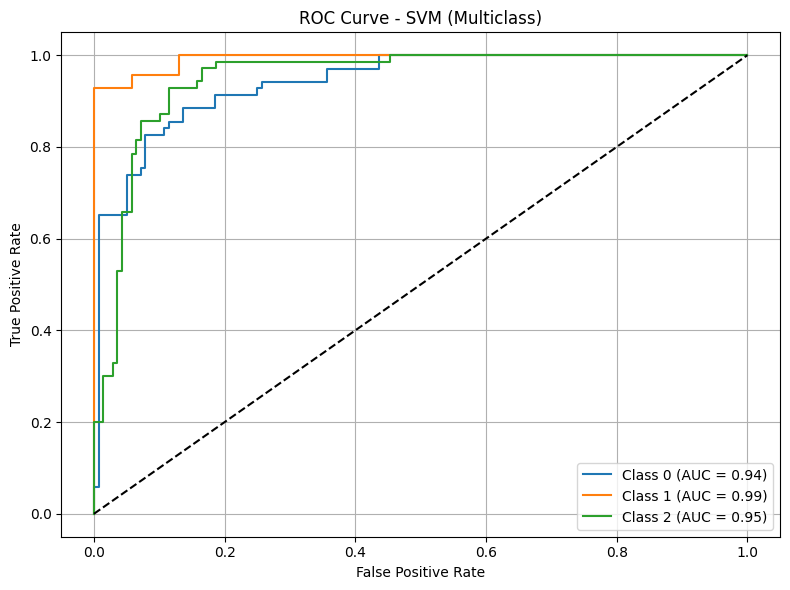

Macro-average AUC     : 0.9610
Weighted-average AUC : 0.9611


In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Example split (ensure X and y are defined before this step)
# X = df.drop(columns='target')
# y = df['target']
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 1. Train SVM model with probability estimates enabled
model = SVC(probability=True, kernel='rbf', random_state=42)
model.fit(X_train, y_train)

# 2. Binarize true labels
classes = model.classes_
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# 3. Predict probabilities
y_score = model.predict_proba(X_test)

# 4. ROC and AUC per class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 5. Plot ROC Curve
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {classes[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM (Multiclass)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Print macro and weighted AUC
macro_auc = roc_auc_score(y_test_bin, y_score, average='macro', multi_class='ovr')
weighted_auc = roc_auc_score(y_test_bin, y_score, average='weighted', multi_class='ovr')

print(f"Macro-average AUC     : {macro_auc:.4f}")
print(f"Weighted-average AUC : {weighted_auc:.4f}")


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Average CV accuracy: {:.4f}".format(scores.mean()))

Cross-validation scores: [0.82857143 0.78417266 0.84172662 0.76258993 0.81294964]
Average CV accuracy: 0.8060


XGBOOSTING

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Assuming X and y are already defined

# Encode categorical target if it's not already numerical
if y.dtype == 'object' or y.dtype.name == 'category':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Define the XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=10)

# Hyperparameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=40)

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=cv_strategy,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Output best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Predict using best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Train accuracy
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))

# Evaluation results
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(f"Train Accuracy: {train_accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))


Fitting 10 folds for each of 972 candidates, totalling 9720 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:55:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}
Best Cross-Validation Score: 0.930187074829932
Test Accuracy: 0.9234449760765551
Train Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0     0.9242    0.8841    0.9037        69
           1     0.9459    1.0000    0.9722        70
           2     0.8986    0.8857    0.8921        70

    accuracy                         0.9234       209
   macro avg     0.9229    0.9233    0.9227       209
weighted avg     0.9229    0.9234    0.9228       209



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:27:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


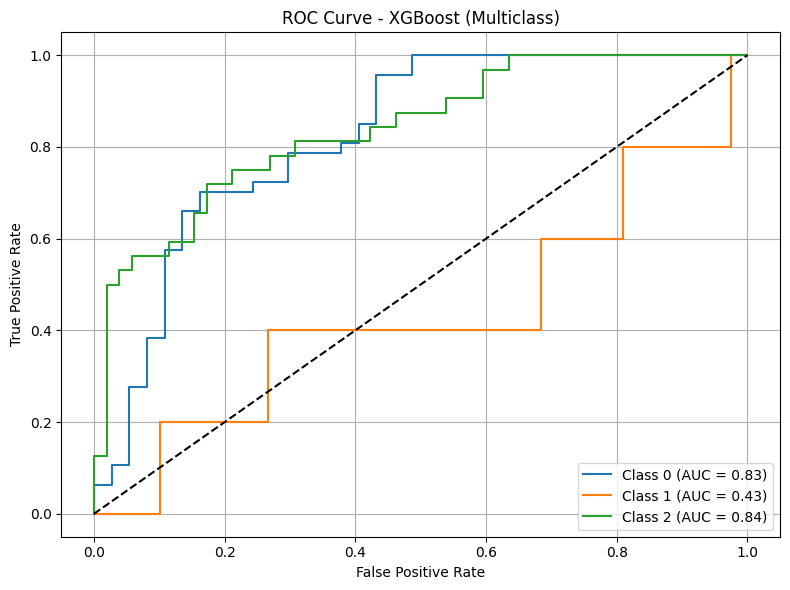

Macro-average AUC     : 0.6994
Weighted-average AUC : 0.8076


In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Example split (ensure X and y are defined before this step)
# X = df.drop(columns='target')
# y = df['target']
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 1. Train XGBoost model
model = XGBClassifier(
    objective='multi:softprob',  # for multiclass probability output
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)
model.fit(X_train, y_train)

# 2. Binarize true labels
classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# 3. Predict probabilities
y_score = model.predict_proba(X_test)

# 4. ROC and AUC per class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 5. Plot ROC Curve
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {classes[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost (Multiclass)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Print macro and weighted AUC
macro_auc = roc_auc_score(y_test_bin, y_score, average='macro', multi_class='ovr')
weighted_auc = roc_auc_score(y_test_bin, y_score, average='weighted', multi_class='ovr')

print(f"Macro-average AUC     : {macro_auc:.4f}")
print(f"Weighted-average AUC : {weighted_auc:.4f}")


#Gradient Boosting

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Assuming X and y are already defined

# Encode target if categorical
if y.dtype == 'object' or y.dtype.name == 'category':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Define the Gradient Boosting model
gb = GradientBoostingClassifier(random_state=10)

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=40)

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    cv=cv_strategy,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Output best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Predict using best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Train accuracy
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))

# Evaluation results
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(f"Train Accuracy: {train_accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))


Fitting 10 folds for each of 36 candidates, totalling 360 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
Best Cross-Validation Score: 0.9321853741496599
Test Accuracy: 0.937799043062201
Train Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0     0.9000    0.9130    0.9065        69
           1     0.9859    1.0000    0.9929        70
           2     0.9265    0.9000    0.9130        70

    accuracy                         0.9378       209
   macro avg     0.9375    0.9377    0.9375       209
weighted avg     0.9376    0.9378    0.9376       209



#Ada Boosting

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Assuming X and y are already defined

# Encode target if categorical
if y.dtype == 'object' or y.dtype.name == 'category':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Base estimator for AdaBoost (shallow decision tree)
base_estimator = DecisionTreeClassifier(max_depth=1)

# AdaBoost model with correct estimator param
ada = AdaBoostClassifier(estimator=base_estimator, random_state=10)

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1]
}

# Cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=40)

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=ada,
    param_grid=param_grid,
    cv=cv_strategy,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit model
grid_search.fit(X_train, y_train)

# Output best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Predict with best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Train accuracy
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))

# Evaluation results
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(f"Train Accuracy: {train_accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))


Fitting 10 folds for each of 9 candidates, totalling 90 fits
Best Parameters: {'learning_rate': 1, 'n_estimators': 150}
Best Cross-Validation Score: 0.7720663265306122
Test Accuracy: 0.7703349282296651
Train Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0     0.7910    0.7681    0.7794        69
           1     0.7606    0.7714    0.7660        70
           2     0.7606    0.7714    0.7660        70

    accuracy                         0.7703       209
   macro avg     0.7707    0.7703    0.7704       209
weighted avg     0.7706    0.7703    0.7704       209



##KNN

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Assuming X and y are already defined

# Encode target if categorical
if y.dtype == 'object' or y.dtype.name == 'category':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Scaling is important for KNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Define KNN model
knn = KNeighborsClassifier()

# Hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=40)

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=cv_strategy,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Output best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Predict using best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Train accuracy
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))

# Evaluation results
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(f"Train Accuracy: {train_accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))


Fitting 10 folds for each of 16 candidates, totalling 160 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best Cross-Validation Score: 0.8727891156462585
Test Accuracy: 0.8947368421052632
Train Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0     0.9310    0.7826    0.8504        69
           1     0.9091    1.0000    0.9524        70
           2     0.8514    0.9000    0.8750        70

    accuracy                         0.8947       209
   macro avg     0.8972    0.8942    0.8926       209
weighted avg     0.8970    0.8947    0.8928       209



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Split the data
X = df.drop('Status', axis=1)
y = df['Status']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Train the KNN model
knn_model = KNeighborsClassifier(
    n_neighbors=5,         # You can tune this value
    weights='uniform',     # 'distance' can be another option
    metric='minkowski',    # Euclidean distance by default (p=2)
    p=2
)

knn_model.fit(X_train, y_train)

# Predict
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

# Evaluate
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))


Train Accuracy: 0.8053892215568862
Test Accuracy: 0.7142857142857143
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.70      0.89      0.79        47
           1       0.00      0.00      0.00         5
           2       0.78      0.56      0.65        32

    accuracy                           0.71        84
   macro avg       0.49      0.49      0.48        84
weighted avg       0.69      0.71      0.69        84



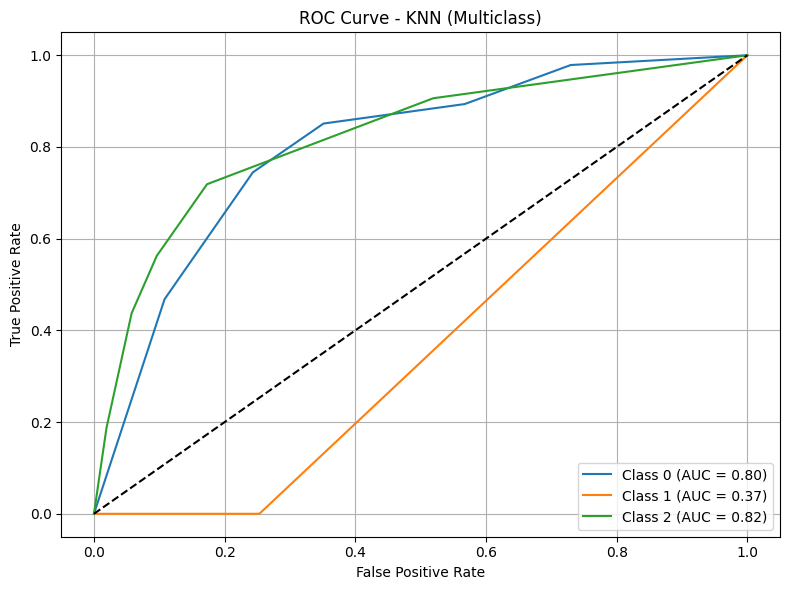

Macro-average AUC     : 0.6655
Weighted-average AUC : 0.7837


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Example split (ensure X and y are defined before this step)
# X = df.drop(columns='target')
# y = df['target']
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 1. Train KNN model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# 2. Binarize true labels
classes = model.classes_
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# 3. Predict probabilities
y_score = model.predict_proba(X_test)

# 4. ROC and AUC per class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 5. Plot ROC Curve
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {classes[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN (Multiclass)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Print macro and weighted AUC
macro_auc = roc_auc_score(y_test_bin, y_score, average='macro', multi_class='ovr')
weighted_auc = roc_auc_score(y_test_bin, y_score, average='weighted', multi_class='ovr')

print(f"Macro-average AUC     : {macro_auc:.4f}")
print(f"Weighted-average AUC : {weighted_auc:.4f}")


In [ ]:
df_model_performance= [
    {
        "Model": "Logistic Regression",
        "Train Accuracy": "0.71",
        "Test Accuracy": "0.68",
        "model Accuracy":"0.68"

    },
    {
        "Model": "Decision Tree",
        "Train Accuracy": "0.1",
        "Test Accuracy": "0.91",
        "model Accuracy":"0.69"

    },
    {
        "Model": "Random Forest",
        "Train Accuracy": "0.86",
        "Test Accuracy": "0.93",
        "model Accuracy":"0.93"
    },
    {
        "Model": "SVM",
        "Train Accuracy": "0.98",
        "Test Accuracy": "0.89",
        "model Accuracy":"0.89"
    },
    {
        "Model": "Gradient Boosting",
        "Train Accuracy": "0.1",
        "Test Accuracy": "0.93",
        "model Accuracy":"0.93"

    },
    {
        "Model": "XGBoost",
        "Train Accuracy": "0.1",
        "Test Accuracy": "0.92",
        "model Accuracy":"0.76"

    },
    {
        "Model": "AdaBoost",
        "Train Accuracy": "78",
        "Test Accuracy": "0.77",
        "model Accuracy":"0.77"

    },
    {
        "Model": "KNN",
        "Train Accuracy": "0.1",
        "Test Accuracy": "0.89",
        "model Accuracy":"0.70"

    }
]

# Convert to DataFrame
df_model_performance = pd.DataFrame(df_model_performance)

# Display the DataFrame
display(df_model_performance)

,Model,Train Accuracy,Test Accuracy,model Accuracy
0,Logistic Regression,0.71,0.68,0.68
1,Decision Tree,0.1,0.91,0.69
2,Random Forest,0.86,0.93,0.93
3,SVM,0.98,0.89,0.89
4,Gradient Boosting,0.1,0.93,0.93
5,XGBoost,0.1,0.92,0.76
6,AdaBoost,78,0.77,0.77
7,KNN,0.1,0.89,0.70



##Summary
Objective: The goal was to build a predictive model for liver disease outcomes (survival, transplant, or complications) using clinical markers from the Cirrhosis dataset.

Key Steps Taken:

Data Loading & Initial Exploration: Loaded the dataset and performed initial checks to understand its structure and missing values.

Data Cleaning:

Dropped the ID column as it was redundant.

Converted Age from days to years for better interpretability.

Handled missing values using probabilistic imputation for categorical variables (e.g., Drug, Sex, Ascites, etc.).

Exploratory Data Analysis (EDA):

Generated box plots for numerical features to identify outliers and distributions.

Analyzed relationships between features and the target variable (Status or Stage).

Model Training & Evaluation:

Trained multiple models, including Decision Tree, Random Forest, and XGBoost.

Evaluated models using accuracy, classification reports, and confusion matrices.

Random Forest emerged as the best model due to its high accuracy.

Next Steps:

Perform hyperparameter tuning to further optimize Random Forest.

Deploy the model for real-world predictions (e.g., using Streamlit).

Summarize key insights and feature importance for clinical decision-making.

**Conclusion**: The Random Forest model showed the best performance, making it the preferred choice for predicting liver disease outcomes based on the given dataset. Further refinement and deployment could enhance its practical utility

In [ ]:
import pickle

# Save the trained model
with open('rf.pkl', 'wb') as file:
    pickle.dump(rf, file)

print("Model saved as rf.pkl")

Model saved as rf.pkl
